In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Non-flipped sensor
### compares the results from 
#### (1) Non-aligned data 
#### (2) Aligned data through correlation (3 calibration gestures)
#### (3) Data Augmentation in training data

In [3]:
stats_v1 = pd.read_pickle('Between_session_DataAugmentation_shift2_0811_only_rotation.pkl')
stats_v2 = pd.read_pickle('Between_session_Rotation_0810_only_rotation.pkl')

Text(39.955, 1.05, 'Original 0.64 +/- 0.28\nRotation 0.82 +/- 0.11\nDataAug 0.80 +/- 0.12')

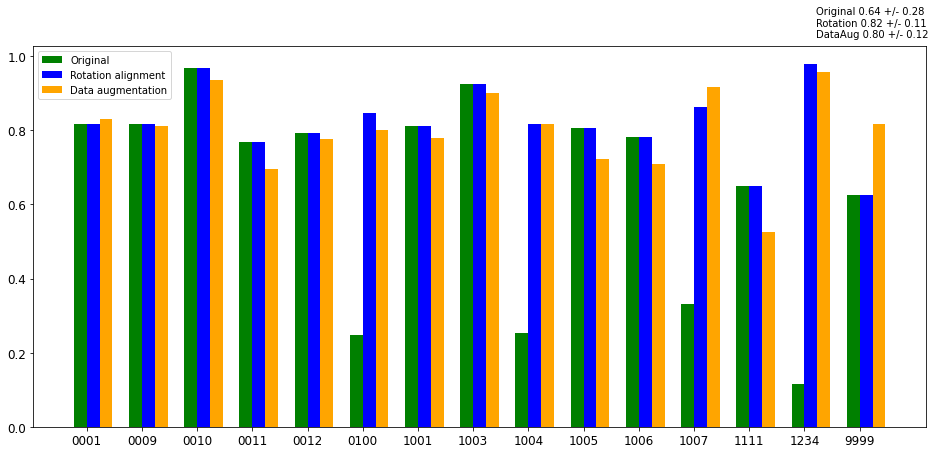

In [5]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
gridnumber = np.arange(0, 3 *len(stats_v1['ID'].unique()), step = 3)
width = 0.70
plt.figure(figsize = (16, 7))
plt.bar(gridnumber , stats_v2.groupby('ID')['Accuracy_before_armband_rotation'].mean(), width = width, color = 'green', label = 'Original')
plt.bar(gridnumber + width, stats_v2.groupby('ID')['Accuracy_after_armband_rotation'].mean(), width = width, color = 'blue', label = 'Rotation alignment')
plt.bar(gridnumber + 2*width, stats_v1.groupby('ID')['Accuracy_with_data_augmentation'].mean(), width = width, color = 'orange', label = 'Data augmentation')
plt.xticks(gridnumber + width / 2, (stats_v2.groupby('ID')['Accuracy_before_armband_rotation'].mean().index))
plt.legend()
Original = stats_v2['Accuracy_before_armband_rotation']
Rotation = stats_v2['Accuracy_after_armband_rotation']
DataAugmentation = stats_v1['Accuracy_with_data_augmentation']
plt.text(s = f'Original {Original.mean():.2f} +/- {Original.std():.2f}\nRotation {Rotation.mean():.2f} +/- {Rotation.std():.2f}\nDataAug {DataAugmentation.mean():.2f} +/- {DataAugmentation.std():.2f}', x = plt.xlim()[-1] - 6, y = 1.05)
# plt.savefig('Between_session_rotation_augmentation.png')

# Flipped sensor
### compares the results from 
#### (1) Non-aligned data 
#### (2) Aligned data through correlation (3 calibration gestures)
#### (3) Data Augmentation in training data

In [6]:
stats_v1 = pd.read_pickle('Between_session_DataAugmentation_all_shifts_0817_both.pkl')
stats_v2 = pd.read_pickle('Between_session_Rotation_0817_both.pkl')

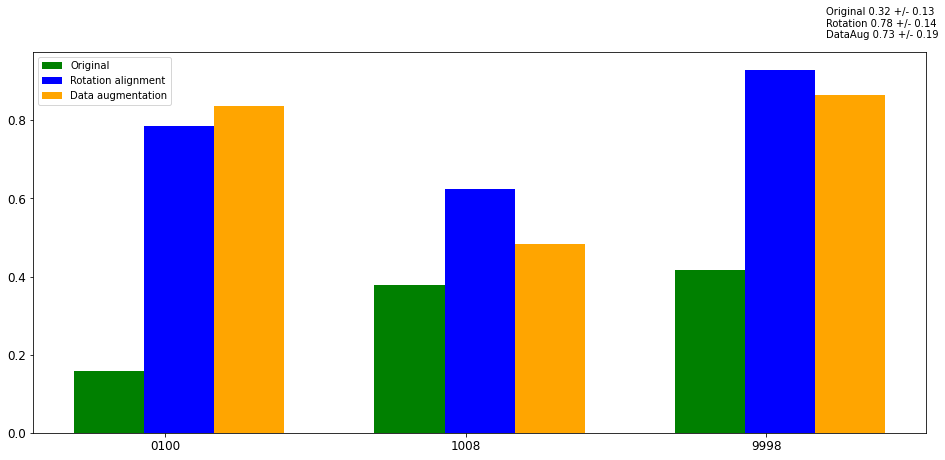

In [7]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
gridnumber = np.arange(0, 3 *len(stats_v1.index.unique()), step = 3)
width = 0.70
plt.figure(figsize = (16, 7))
plt.bar(gridnumber , stats_v2.groupby('ID')['Accuracy_before_armband_rotation'].mean(), width = width, color = 'green', label = 'Original')
plt.bar(gridnumber + width, stats_v2.groupby('ID')['Accuracy_after_armband_rotation'].mean(), width = width, color = 'blue', label = 'Rotation alignment')
plt.bar(gridnumber + 2*width, stats_v1.groupby('ID')['Accuracy_with_data_augmentation'].mean(), width = width, color = 'orange', label = 'Data augmentation')
plt.xticks(gridnumber + width / 1.25, (stats_v2.groupby('ID')['Accuracy_before_armband_rotation'].mean().index))
plt.legend()
Original = stats_v2['Accuracy_before_armband_rotation']
Rotation = stats_v2['Accuracy_after_armband_rotation']
DataAugmentation = stats_v1['Accuracy_with_data_augmentation']
plt.text(s = f'Original {Original.mean():.2f} +/- {Original.std():.2f}\nRotation {Rotation.mean():.2f} +/- {Rotation.std():.2f}\nDataAug {DataAugmentation.mean():.2f} +/- {DataAugmentation.std():.2f}', x = plt.xlim()[-1] - 1, y = 1.01)
plt.savefig('Between_session_rotation_flipping_augmentation.png')

### Summary

(1) We could identify the right orientation using 3 calibration gestures, which we couldn't achieve using only 1. 

(2) We could achieve similar results in both non-flipped or flipped condition using data augmentation. However, it is not always befenficial for all the subjects. The training time also increased since the size of the dataset gets copied 16 times. 